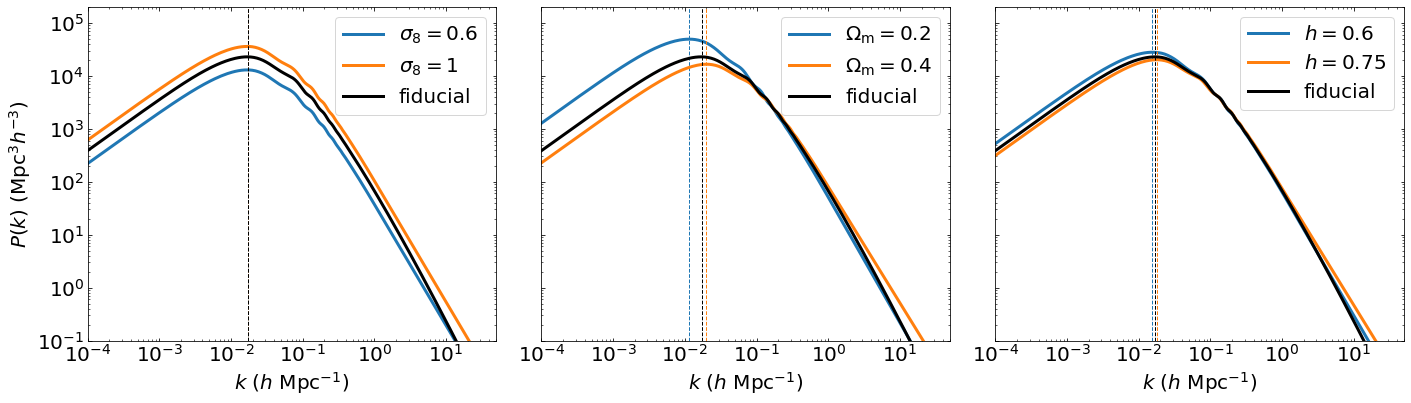

In [27]:
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
from hmf import MassFunction
from itertools import count
from matplotlib import pyplot as plt, rcParams
import numpy as np

# parametros de Planck18
Tcmb0=2.725
h = 0.673
Om0 = 0.316
cparams_fid = dict(H0=100*h, Om0=Om0, Ob0=0.022/h**2, Tcmb0=Tcmb0)
cosmo_fid = FlatLambdaCDM(**cparams_fid)
sigma8_fid = 0.81
hmf_fiducial = MassFunction(
    cosmo_model=cosmo_fid, transfer_model='EH', sigma_8=sigma8_fid)

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 3
fig, axes = plt.subplots(figsize=(20,6), ncols=3)
# Variando amplitud de fluctuaciones
for i, s8 in enumerate((0.6, 1)):
    hmf = MassFunction(cosmo_model=cosmo_fid, sigma_8=s8)
    axes[0].plot(hmf.k, hmf.power, 'C{0}'.format(i), label=r'$\sigma_8={0}$'.format(s8))
    axes[0].axvline(hmf.k[np.argmax(hmf.power)], ls='--', color='C{0}'.format(i), lw=1)
# Variando densidad de materia (oscura)
for i, Om in enumerate((0.2, 0.4)):
    cparams = cparams_fid.copy()
    cparams['Om0'] = Om
    cparams['Ob0'] *= (Om/Om0)
    cosmo = FlatLambdaCDM(**cparams)
    hmf = MassFunction(cosmo_model=cosmo, sigma_8=sigma8_fid)
    axes[1].plot(hmf.k, hmf.power, 'C{0}'.format(i), label=r'$\Omega_\mathrm{{m}}={0}$'.format(Om))
    axes[1].axvline(hmf.k[np.argmax(hmf.power)], ls='--', color='C{0}'.format(i), lw=1)
# Variando H0
for i, h in enumerate((0.60, 0.75)):
    cparams = cparams_fid.copy()
    cparams['H0'] = 100*h
    cosmo = FlatLambdaCDM(**cparams)
    hmf = MassFunction(cosmo_model=cosmo, sigma_8=sigma8_fid)
    axes[2].plot(hmf.k, hmf.power, 'C{0}'.format(i), label=r'$h={0}$'.format(h))
    axes[2].axvline(hmf.k[np.argmax(hmf.power)], ls='--', color='C{0}'.format(i), lw=1)

for ax in axes:
    ax.plot(hmf_fiducial.k, hmf_fiducial.power, 'k-',
            label='fiducial')
    ax.axvline(hmf_fiducial.k[np.argmax(hmf_fiducial.power)], ls='--', color='k', lw=1)
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-4, 50)
    ax.set_ylim(0.1, 2e5)
    ax.set_xlabel('$k$ ($h$ Mpc$^{-1}$)')
axes[0].set_ylabel('$P(k)$ (Mpc$^3h^{-3}$)')
for ax in axes[1:]:
    ax.set_yticklabels([])
fig.tight_layout()